In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier  #kNN 분류기
# sklearn(scikit-learn 패키지)의 neighbors 모듈의 KNeighborsClassifier 클래스를 import 

# 1. 생선 종류 분류 문제

In [2]:
# kaggle Fish market 데이터 셋
fish_file = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/Fish.csv'

In [6]:
# CSV 파일을 읽어서 데이터프레임 생성
fish = pd.read_csv(fish_file)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## 데이터 탐색

In [9]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


* Speices: 타겟(target). 종속 변수. 레이블
* Weight ~ Width 6개 변수: 데이터(훈련 셋). 독립 변수. 설명 변수

In [13]:
# Species의 분포
fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [14]:
# 숫자 타입 데이터들의 분포
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


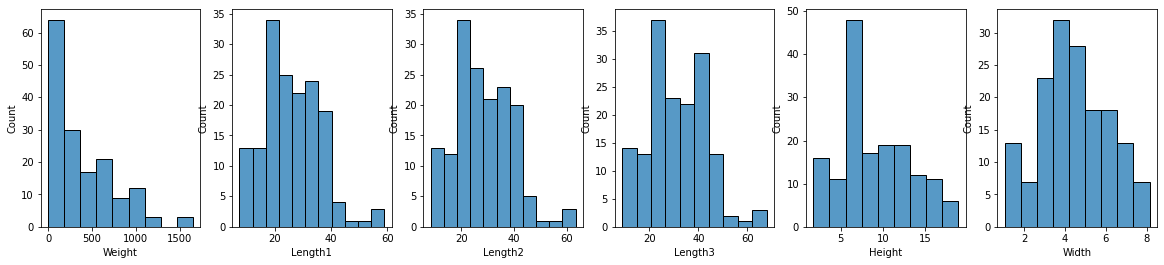

In [54]:
# 6개 히스토그램
# 6개의 subplot을 생성
fig, ax = plt.subplots(ncols=6, figsize=(20, 4))

# 히스토그램을 그릴 5개 변수 
variables = fish.columns[1:]

# 각 변수마다 반복하면서 히스토그램을 그림
for i, var in enumerate(variables):
    # ax[i].hist(fish[var])
    # ax[i].set_xlabel(var)
    sns.histplot(data=fish, x=var, ax=ax[i])

plt.show()

# 2개 어종 분류 문제

* Bream(도미), Smelt(빙어) 어종 선택 
* Weight, Length2 변수만 고려 

In [73]:
# bream 어종만 가지고 있는 부분집합 
bream = fish[fish['Species'] == 'Bream']
num_bream = len(bream)
print(num_bream)

35


In [67]:
bream.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [75]:
bream_weight = bream['Weight']

In [77]:
type(bream_weight)

pandas.core.series.Series

In [87]:
bream_weight = bream['Weight'].values  # Bream 어종의 Weight 값들의 배열
bream_length = bream['Length2'].values # Bream 어종의 Length2 값들의 배열

# bream['Weight'] 까지만 입력하면 시리즈이고, .values를 하게 되면 array 이다

In [88]:
bream_weight

array([ 242.,  290.,  340.,  363.,  430.,  450.,  500.,  390.,  450.,
        500.,  475.,  500.,  500.,  340.,  600.,  600.,  700.,  700.,
        610.,  650.,  575.,  685.,  620.,  680.,  700.,  725.,  720.,
        714.,  850., 1000.,  920.,  955.,  925.,  975.,  950.])

In [89]:
bream_length

array([25.4, 26.3, 26.5, 29. , 29. , 29.7, 29.7, 30. , 30. , 30.7, 31. ,
       31. , 31.5, 32. , 32. , 32. , 33. , 33. , 33.5, 33.5, 34. , 34. ,
       34.5, 35. , 35. , 35. , 35. , 36. , 36. , 37. , 38.5, 38.5, 39.5,
       41. , 41. ])

In [90]:
# smelt 어종만 가지고 있는 부분집합
smelt = fish[fish['Species'] == 'Smelt']
num_smelt = len(smelt)
print(num_smelt)

14


In [91]:
smelt_weight = smelt['Weight'].values
smelt_length = smelt['Length2'].values

In [95]:
smelt_weight

array([ 6.7,  7.5,  7. ,  9.7,  9.8,  8.7, 10. ,  9.9,  9.8, 12.2, 13.4,
       12.2, 19.7, 19.9])

In [96]:
smelt_length

array([ 9.8, 10.5, 10.6, 11. , 11.2, 11.3, 11.8, 11.8, 12. , 12.2, 12.4,
       13. , 14.3, 15. ])

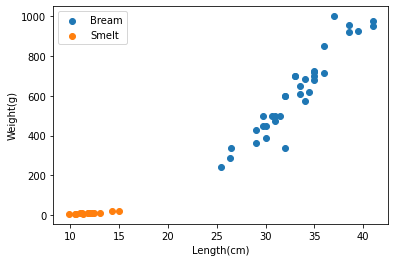

In [105]:
# Weight ~ Length 산점도 그래프. 점 색상은 어종(Bream, Smelt)에 따라서 다르게 
plt.scatter(x=bream_length, y=bream_weight, label='Bream')
plt.scatter(x=smelt_length, y=smelt_weight, label='Smelt')

plt.legend()
plt.xlabel('Length(cm)')
plt.ylabel('Weight(g)')
plt.show()

## 머신러닝 모델 훈련 

지도 학습

* 데이터 - 2차원 배열(ndarray) 
* 타겟(레이블) - 1차원 배열 

In [132]:
# 도미 데이터: 도미(bream)의 weight와 length를 갖고 있는 2차원 배열
# [[w1, l1], [w2, l2], ...]
# bream_data = [[w, l] for w, l in zip(bream_weight, bream_length)]
bream_data = np.c_[bream_weight, bream_length]
len(bream_data)

35

In [127]:
bream_data[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [126]:
bream_data[-5:]

array([[920. ,  38.5],
       [955. ,  38.5],
       [925. ,  39.5],
       [975. ,  41. ],
       [950. ,  41. ]])

In [131]:
# 빙어 데이터: 빙어(smelt)의 weight와 length를 갖고 있는 2차원 배열 
smelt_data = np.c_[smelt_weight, smelt_length]
len(smelt_data)

14

In [134]:
smelt_data[5:]

array([[ 8.7, 11.3],
       [10. , 11.8],
       [ 9.9, 11.8],
       [ 9.8, 12. ],
       [12.2, 12.2],
       [13.4, 12.4],
       [12.2, 13. ],
       [19.7, 14.3],
       [19.9, 15. ]])

In [133]:
# 생선 데이터: 도미/빙어 데이터의 row들을 합쳐서 만들어진 2차원 배열. 훈련 데이터
fish_data = np.r_[bream_data, smelt_data]
len(fish_data)

49

In [136]:
fish_data[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [137]:
fish_data[-5:]

array([[12.2, 12.2],
       [13.4, 12.4],
       [12.2, 13. ],
       [19.7, 14.3],
       [19.9, 15. ]])

In [142]:
# 타겟(target): 레이블. 1-도미(bream), 0-빙어(smelt)들로 이루어진 1차원 배열
fish_label = np.array([1] * num_bream + [0] * num_smelt)
fish_label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

## 훈련 모델 선택, 생성

In [147]:
knn_cls = KNeighborsClassifier()  # kNN 분류기 모델 생성

In [148]:
# 훈련 데이터, 레이블로 모델을 학습시킴
knn_cls.fit(X=fish_data, y=fish_label)
# 대문자(X)는 2차원, 소문자(y)는 1차원

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

kNN(k-Nearest Neighbors, k-최근접 이웃) 분류기는 별도의 훈련 시간이 필요치 않음.

모든 훈련 데이터와 훈련 레이블을 단순히 저장만 하고 있다가, 테스트 데이터가 입력됐을 때 가장 가까운 이웃 k개를 찾아서 예측을 하기 때문에.

In [149]:
# 숨겨진 속성(hidden attributes)
# 1) _fit_X: 훈련 데이터를 저장
knn_cls._fit_X[:5]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [150]:
knn_cls._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
# 2) _y: fit() 메서드에서 파라미터 y에 전달한 훈련 레이블(1차원 배열)을 저장 
knn_cls._y

## 모델 평가

In [151]:
# 훈련 데이터를 얼마나 잘 분류하는지 평가
# 훈련 데이터의 예측값 계산 -> 훈련 데이터의 레이블과 비교
train_predicts = knn_cls.predict(fish_data)
train_predicts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [152]:
train_predicts == fish_label   # 예측값 == 실제값

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [153]:
# 훈련 데이터 예측의 정확도
np.mean(train_predicts == fish_label)

1.0

In [154]:
knn_cls.score(X=fish_data, y=fish_label)
# score 함수를 통해서 위와 같은 결과를 가져올 수 있다 

1.0

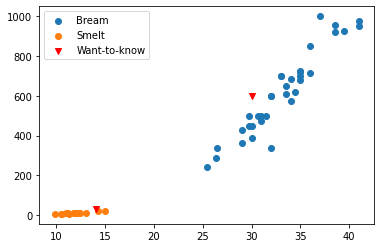

In [159]:
# 가상의 생선 2마리: [[600g, 30cm], [30g, 14cm]]
plt.scatter(bream_length, bream_weight, label='Bream')
plt.scatter(smelt_length, smelt_weight, label='Smelt')
plt.scatter([30, 14], [600, 30], marker='v', color='red', label='Want-to-know')

plt.legend()
plt.show()

In [160]:
knn_cls.predict([[600, 30], [50, 14]])

array([1, 0])

In [168]:
# knn_cls.predict(np.reshape([600, 30], (-1, 2)))
knn_cls.predict([[600, 30]])  # shape: (1, 2) -> 2차원 배열

array([1])

In [171]:
knn_cls.predict([[50, 14]])

array([0])

## k값에 따른 성능 변환

In [174]:
knn_cls.get_params()  # 머신러닝이 가지고 있는 모델 파라미터들과 설정된 값들

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [173]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [176]:
knn_cls.n_neighbors  # 머신러닝 알고리즘의 모델 파라미터 하나의 값을 알아내거나 변경할 수 있음

5

## k=1 kNN 모델 훈련/평가

In [177]:
knn_1 = KNeighborsClassifier(n_neighbors=1)
#> 가장 가까운 이웃 1개의 레이블로 값을 예측 
knn_1.fit(X=fish_data, y=fish_label)
knn_1.score(X=fish_data, y=fish_label)

1.0

In [178]:
# 훈련 셋의 모든 샘플 간의 거리를 사용해서 예측
knn_49 = KNeighborsClassifier(n_neighbors=49)  # bream(35) + smelt(14)
knn_49.fit(fish_data, fish_label)
knn_49.score(fish_data, fish_label)

0.7142857142857143

In [180]:
num_bream / (num_bream + num_smelt)  # 35 / 49
#> k값을 너무 크게 잡으면 훈련셋의 분포도의 영향을 받게 된다(다수결 법칙)

0.7142857142857143

In [182]:
knn = KNeighborsClassifier()  # k=5
knn.fit(fish_data, fish_label)
knn.n_neighbors = 49   # 모델 파라미터를 이렇게도 변경 가능하다
knn.score(fish_data, fish_label)

0.7142857142857143

k 값을 1 ~ 49 까지 변환시키면서 score를 계산. score 시각화

In [192]:
knn = KNeighborsClassifier()
knn.fit(X=fish_data, y=fish_label)

knn_scores = []  # k값이 달라질 때마다 계산한 score를 저장할 리스트 
for k in range(1, 50): 
    knn.n_neighbors = k
    score = knn.score(X=fish_data, y=fish_label)
    knn_scores.append(score)

print(knn_scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9795918367346939, 0.9591836734693877, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143, 0.7142857142857143]


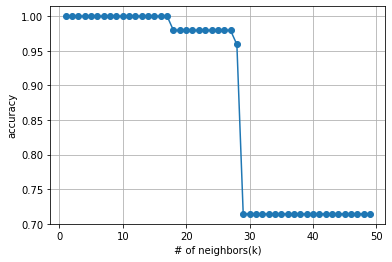

In [193]:
plt.plot(range(1, 50), knn_scores, 'o-')
plt.xlabel('# of neighbors(k)')
plt.ylabel('accuracy')
plt.grid()
plt.show()

In [195]:
np.argmax(knn_scores)  
# 배열에서 최댓값의 인덱스(동일한 최댓값이 여러개 있는 경우, 가장 처음의 최댓값 인덱스) 

0

In [196]:
np.argmin(knn_scores)
# 배열에서 최솟값의 인덱스(동일한 최솟값이 여러개 있는 경우, 가장 처음의 최솟값 인덱스) 

28

In [201]:
#> [1, 0.9, 0.8]  < 1   # 오류 발생

np.array([1, 0.9, 0.8]) < 1
#> 브로드캐스팅과 같은 원리다
# np.array([1, 0.9, 0.8]) < np.ones((3,))

array([False,  True,  True])

In [202]:
np.argwhere(np.array(knn_scores) < 1)[0]
# knn_scores는 리스트이다. 리스트는 크기 비교가 안된다. 

array([17])

---

# 데이터 저장

* Google Drive 마운트 
* fish_data와 fish_label 2개의 리스트를 dict로 만들어서 pickle 파일에 저장
* pickle 파일에서 데이터 읽어서 2개의 리스트로 만들기 

In [203]:
data_file = '/content/drive/MyDrive/lab_ml/fish.pickle'

In [204]:
import pickle 

In [205]:
# fish_data, fish_label을 value로 갖는 dict
obj = {'data': fish_data, 'target': fish_label}

# 파일을 'write binary' 모드로 오픈
with open(data_file, mode='wb') as f:
    pickle.dump(obj, f)   # 파일에 데이터 쓰기 

In [211]:
# pickle 파일에서 데이터 읽기
with open(data_file, mode='rb') as f:  # 파일을 'read binary' 모드로 오픈
    obj_from_file = pickle.load(f)  # 파일에서 데이터 읽기 

obj_from_file.keys()

dict_keys(['data', 'target'])

In [212]:
obj_from_file['target']

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])